<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/feed_forward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 74.3MB 346kB/s 
    100% |████████████████████████████████| 245kB 18.3MB/s 
    100% |████████████████████████████████| 3.2MB 8.0MB/s 
    100% |████████████████████████████████| 61kB 25.0MB/s 
    100% |████████████████████████████████| 61kB 24.9MB/s 
    100% |████████████████████████████████| 112kB 35.6MB/s 


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
L = tf.keras.layers

In [0]:
def toy_data():
    x = np.linspace(-2, 2, 100).reshape(-1, 1)
    a1 = -3
    a2 = -2
    a3 = 2
    b = 1
    y = a1*x + a2*x**2 + a3*x**3 + 3*np.random.randn(100, 1)
    return x, y

x, y = toy_data()

$$
\begin{align}
y &= -3x -2x^2 + 2x^3 + 3\epsilon \\
\epsilon &\sim N(0, 1)
\end{align}
$$

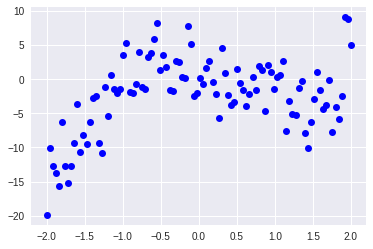

In [5]:
# polynomial
plt.plot(x, y, "bo")

In [0]:
x_train = tf.convert_to_tensor(x, dtype=tf.float32)
y_train = tf.convert_to_tensor(y, dtype=tf.float32)

#### モデル1
3層パーセプトロンで活性化関数ReLU

#### モデル2
3層パーセプトロンで活性化関数tanh

In [0]:
learning_rate = 1e-4
hidden_size = 10

model_relu = tf.keras.Sequential([
    L.Dense(hidden_size, activation="relu"),
    L.Dense(hidden_size, activation="relu"),
    L.Dense(1),
])

model_tanh = tf.keras.Sequential([
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(1),
])

def loss_fn(model, x, y):
    y_ = model(x)
    return tf.keras.losses.mean_squared_error(y, y_)

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [9]:
for i in range(1000):
    # training model_relu
    with tf.GradientTape(persistent=True) as tape:
        loss_relu = loss_fn(model_relu, x_train, y_train)
        loss_tanh = loss_fn(model_tanh, x_train, y_train)
    
    grads_relu = tape.gradient(loss_relu, model_relu.variables)
    grads_tanh = tape.gradient(loss_tanh, model_tanh.variables)
    
    optimizer.apply_gradients(zip(grads_relu, model_relu.variables))
    optimizer.apply_gradients(zip(grads_tanh, model_tanh.variables))
       
    if (i + 1) % 100 == 0:
        print("epoch ", i + 1)
        print("loss_relu : {}".format(loss_relu.numpy().mean()))
        print("loss_tanh : {}".format(loss_tanh.numpy().mean()))        

Instructions for updating:
Colocations handled automatically by placer.
epoch  100
loss_relu : 13.60205078125
loss_tanh : 22.376253128051758
epoch  200
loss_relu : 12.42266845703125
loss_tanh : 13.638594627380371
epoch  300
loss_relu : 12.200483322143555
loss_tanh : 12.579218864440918
epoch  400
loss_relu : 12.054424285888672
loss_tanh : 12.441134452819824
epoch  500
loss_relu : 11.914139747619629
loss_tanh : 12.34143352508545
epoch  600
loss_relu : 11.788325309753418
loss_tanh : 12.215806007385254
epoch  700
loss_relu : 11.657098770141602
loss_tanh : 12.121011734008789
epoch  800
loss_relu : 11.503227233886719
loss_tanh : 12.04101276397705
epoch  900
loss_relu : 11.349077224731445
loss_tanh : 11.946876525878906
epoch  1000
loss_relu : 11.18554401397705
loss_tanh : 11.826896667480469


In [0]:
y_predict_relu = model_relu(x_train).numpy()
y_predict_tanh = model_tanh(x_train).numpy()

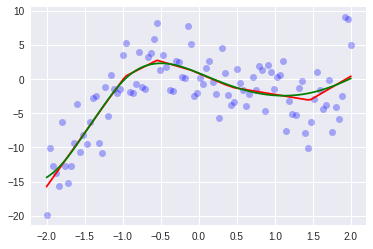

In [11]:
# polynomial data
plt.plot(x, y, "bo", alpha=0.3)
# model_relu predict
plt.plot(x, y_predict_relu, color="r")
# model_tanh predict
plt.plot(x, y_predict_tanh, color="g")